In [1]:
# This script trains a linear Support Vector Machine (SVM) to classify Iris Virginica flowers 
# based on petal length and width. The SVM model tries to find the optimal hyperplane that best 
# separates the two classes (Virginica vs. non-Virginica) with the maximum margin. 
# A linear kernel is used, and the hinge loss function helps enforce this margin maximization.

# Import necessary libraries and modules
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load the Iris dataset
iris = datasets.load_iris()

# Select petal length and petal width as features (2D input)
X = iris["data"][:, (2, 3)]  # Features: petal length and petal width

# Create binary target variable: 1 if Iris Virginica, 0 otherwise
y = (iris["target"] == 2).astype(np.float64)  # Target: Iris Virginica classification

# Create a pipeline that standardizes the data then applies a linear SVM classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),               # Feature scaling for better SVM performance
    ("linear_svc", LinearSVC(C=1, loss="hinge"))  # Linear SVM classifier with hinge loss
])

# Train the SVM classifier on the dataset
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

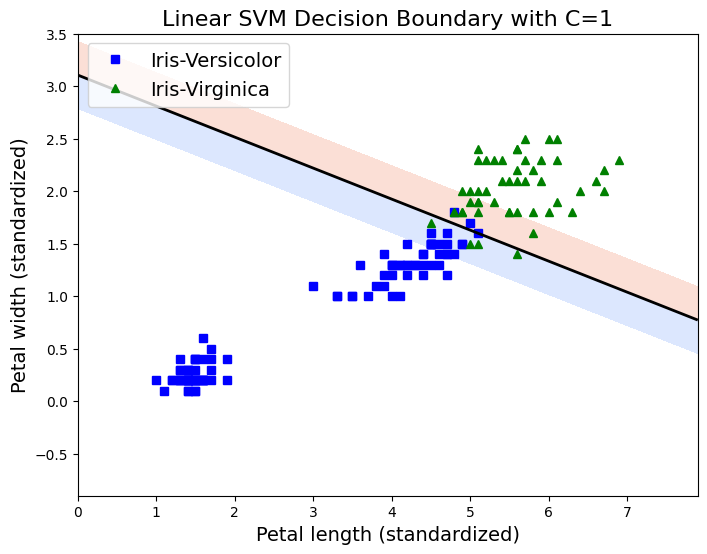

In [2]:
import matplotlib.pyplot as plt

# Function to plot the decision boundary for a trained SVM classifier
def plot_svc_decision_boundary(svm_clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()  # Get current axes if none provided
    
    # Generate a grid of values across the feature space
    x0s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    x1s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    
    # Flatten the grid to shape (N, 2) for predictions
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    # Compute decision function for the grid
    y_pred = svm_clf.decision_function(X_new).reshape(x0.shape)
    
    # Plot filled contours for margin regions (-1, 0, +1)
    ax.contourf(x0, x1, y_pred, levels=[-1, 0, 1], alpha=0.3, cmap="coolwarm")
    
    # Plot decision boundary (where decision function = 0)
    ax.contour(x0, x1, y_pred, levels=[0], linewidths=2, colors='black')

# Plot the dataset and the decision boundary
plt.figure(figsize=(8, 6))

# Plot class 0 (Not Iris-Virginica) data points
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Versicolor")  # Blue squares

# Plot class 1 (Iris-Virginica) data points
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris-Virginica")   # Green triangles

# Plot SVM decision boundary and margins
plot_svc_decision_boundary(svm_clf, X, y)

# Axis labels and title
plt.xlabel("Petal length (standardized)", fontsize=14)
plt.ylabel("Petal width (standardized)", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Linear SVM Decision Boundary with C=1", fontsize=16)

# Show the plot
plt.show()

In [3]:
# Use the trained SVM classifier to predict the class of a new flower with petal length 5.5 cm and width 1.7 cm
svm_clf.predict([[5.5, 1.7]])

array([1.])

d:\hands_on_machine_learning\C5 - Support Vector Machine\env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


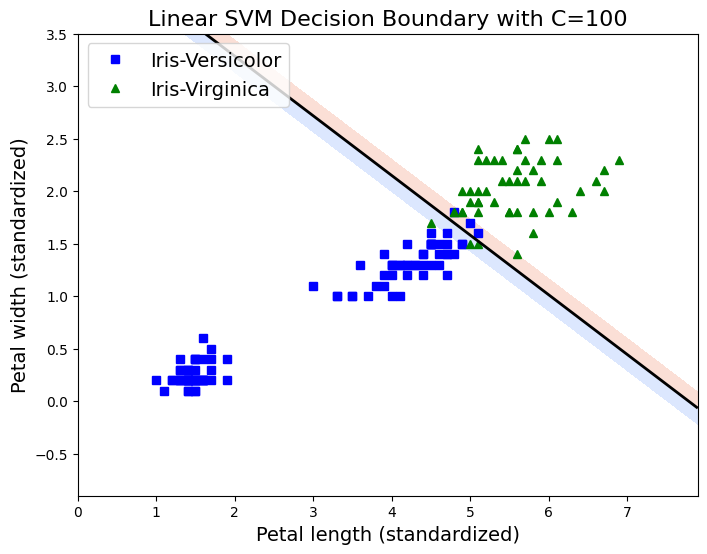

In [4]:
# Train the same Linear SVM classifier with a different regularization hyperparameter (C=100)
svm_clf_c100 = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("linear_svc", LinearSVC(C=100, loss="hinge")),  # Train Linear SVM with stronger emphasis on minimizing classification error
])

# Fit the model to the data
svm_clf_c100.fit(X, y)

# Plot the data points and the decision boundary
plt.figure(figsize=(8, 6))

# Plot class 0 data points (Iris-Versicolor)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Versicolor")  # blue squares

# Plot class 1 data points (Iris-Virginica)
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris-Virginica")   # green triangles

# Plot the decision boundary for the trained SVM model
plot_svc_decision_boundary(svm_clf_c100, X, y)

# Add labels, legend, and title
plt.xlabel("Petal length (standardized)", fontsize=14)
plt.ylabel("Petal width (standardized)", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Linear SVM Decision Boundary with C=100", fontsize=16)

# Display the plot
plt.show()